<a href="https://colab.research.google.com/github/indahfit2201/UAS-AI/blob/main/INDAHUASAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
indahUAS = pd.read_csv('/content/sample_data/archive (6).zip')
indahUAS.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
indahUAS.drop(columns='class', inplace=True)
indahUAS.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [ ]:
indahUAS.shape

(1372, 4)

In [ ]:
indahUAS.columns

Index(['variance', 'skewness', 'curtosis', 'entropy'], dtype='object')

In [ ]:
indahUAS.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
dtype: object

In [ ]:
indahUAS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
dtypes: float64(4)
memory usage: 43.0 KB


In [ ]:
indahUAS.isna().values.any()

False

In [ ]:
indahUAS[indahUAS.duplicated()]

,variance,skewness,curtosis,entropy
47,-0.7869,9.5663,-3.7867,-7.5034
139,-0.2062,9.2207,-3.7044,-6.8103
190,0.9297,-3.7971,4.6429,-0.2957
195,-1.8584,7.8860,-1.6643,-1.8384
226,0.5706,-0.0248,1.2421,-0.5621
268,0.9297,-3.7971,4.6429,-0.2957
284,-1.3000,10.2678,-2.9530,-5.8638
300,0.3292,-4.4552,4.5718,-0.9888
315,0.3292,-4.4552,4.5718,-0.9888
320,0.5195,-3.2633,3.0895,-0.9849


In [ ]:
indahUAS.duplicated().value_counts()

False    1348
True       24
dtype: int64

In [ ]:
indahUAS.drop_duplicates(inplace=True)
indahUAS.shape

(1348, 4)

In [ ]:
indahUAS.describe()

,variance,skewness,curtosis,entropy
count,1348.000000,1348.000000,1348.000000,1348.000000
mean,0.445785,1.909039,1.413578,-1.168712
std,2.862906,5.868600,4.328365,2.085877
min,-7.042100,-13.773100,-5.286100,-8.548200
25%,-1.786650,-1.627000,-1.545600,-2.393100
50%,0.518735,2.334150,0.605495,-0.578890
75%,2.853250,6.796025,3.199800,0.403863
max,6.824800,12.951600,17.927400,2.449500


In [ ]:
indahUAS.corr()

,variance,skewness,curtosis,entropy
variance,1.000000,0.272863,-0.387171,0.273993
skewness,0.272863,1.000000,-0.785376,-0.520293
curtosis,-0.387171,-0.785376,1.000000,0.311379
entropy,0.273993,-0.520293,0.311379,1.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
X = indahUAS.drop(columns='entropy')
X.head()

,variance,skewness,curtosis
0,3.62160,8.6661,-2.8073
1,4.54590,8.1674,-2.4586
2,3.86600,-2.6383,1.9242
3,3.45660,9.5228,-4.0112
4,0.32924,-4.4552,4.5718


In [ ]:
y = indahUAS['entropy']
y.head()

0   -0.44699
1   -1.46210
2    0.10645
3   -3.59440
4   -0.98880
Name: entropy, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=10)
print('training dataset')
print(X_train.shape)
print(y_train.shape)
print()
print('testing dataset:')
print(X_train.shape)
print(y_train.shape)

training dataset
(808, 3)
(808,)

testing dataset:
(808, 3)
(808,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)


In [ ]:
k_range = list(range(1,26))
scores = []
for k in k_range:
  model_knn = KNeighborsClassifier(n_neighbors=k)
  model_knn.fit(X_train, y_train)
  y_pred = model_knn.predict(X_test)
  scores.append(accuracy_score(y_test, y_pred))

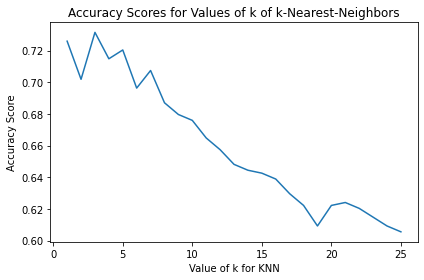

In [ ]:
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.tight_layout()
plt.show()

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred))

0.7314814814814815


In [ ]:
print(confusion_matrix(y_test, y_pred))

[[  0   0   0   0   0   0   0   0   0   0   0]
 [  3   4   3   0   0   0   0   0   0   0   0]
 [  0   2   9   0   0   0   0   0   0   0   0]
 [  0   2   4   6   6   3   0   0   0   0   0]
 [  0   0   0   2  27   1   1   0   0   0   0]
 [  0   0   0   3   7  26   4   2   1   0   0]
 [  0   1   0   0   1   8  19  11   5   0   0]
 [  0   0   0   0   2   6   5  40  11   0   0]
 [  0   0   0   0   0   0   3   9 244  17   1]
 [  0   0   0   0   0   0   0   0  19  19   0]
 [  0   0   0   0   0   0   0   0   0   2   1]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -8       0.00      0.00      0.00         0
          -7       0.44      0.40      0.42        10
          -6       0.56      0.82      0.67        11
          -5       0.55      0.29      0.37        21
          -4       0.63      0.87      0.73        31
          -3       0.59      0.60      0.60        43
          -2       0.59      0.42      0.49        45
          -1       0.65      0.62      0.63        64
           0       0.87      0.89      0.88       274
           1       0.50      0.50      0.50        38
           2       0.50      0.33      0.40         3

    accuracy                           0.73       540
   macro avg       0.53      0.52      0.52       540
weighted avg       0.73      0.73      0.73       540



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model_logreg = LogisticRegression(solver='lbfgs', multi_class='auto')
model_logreg.fit(X_train,y_train)
y_pred = model_logreg.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(accuracy_score(y_test, y_pred))

0.562962962962963


In [ ]:
print(confusion_matrix(y_test, y_pred))

[[  0   3   0   7   0   0   0   0   0   0]
 [  1   4   0   6   0   0   0   0   0   0]
 [  0   2   2   7  10   0   0   0   0   0]
 [  0   0   0  19   6   0   0   6   0   0]
 [  0   3   0   9   7   0   5  19   0   0]
 [  0   1   0   3   4   0   0  37   0   0]
 [  0   0   0   6   2   0   3  53   0   0]
 [  0   0   0   3   0   0   2 269   0   0]
 [  0   0   0   0   0   0   0  38   0   0]
 [  0   0   0   0   0   0   0   3   0   0]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -7       0.00      0.00      0.00        10
          -6       0.31      0.36      0.33        11
          -5       1.00      0.10      0.17        21
          -4       0.32      0.61      0.42        31
          -3       0.24      0.16      0.19        43
          -2       0.00      0.00      0.00        45
          -1       0.30      0.05      0.08        64
           0       0.63      0.98      0.77       274
           1       0.00      0.00      0.00        38
           2       0.00      0.00      0.00         3

    accuracy                           0.56       540
   macro avg       0.28      0.23      0.20       540
weighted avg       0.44      0.56      0.45       540



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.svm import SVC

In [ ]:
model_svc = SVC(gamma='scale')
model_svc.fit(X_train,y_train)
y_pred = model_svc.predict(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
y_pred = model_dt.predict(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train,y_train)
pred_rf = model_rf.predict(X_test)

In [ ]:
models = [model_knn, model_logreg, model_svc, model_dt]
accuracy_scores = []
for model in models:
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  accuracy_scores.append(accuracy)

print(accuracy_scores)

[0.7314814814814815, 0.562962962962963, 0.575925925925926, 0.6944444444444444]


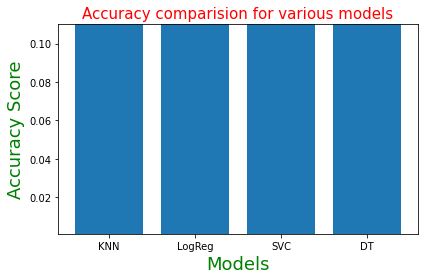

In [ ]:
plt.bar(['KNN', 'LogReg', 'SVC', 'DT'],accuracy_scores)
plt.ylim(0.001,0.11)
plt.title('Accuracy comparision for various models', fontsize=15, color='r')
plt.xlabel('Models', fontsize=18, color='g')
plt.ylabel('Accuracy Score', fontsize=18, color='g')
plt.tight_layout()
plt.show()